In [324]:
%pylab inline
indir = '/mnt/store1/oliverphilcox/3PCF/3PCFCovMatricesAll/'
n=14
m=3

Populating the interactive namespace from numpy and matplotlib


/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#### Load first integral part

In [325]:
def symmetrize(mat):
    """ Add in symmetries to matrices """
    out_mat = np.zeros_like(mat)
    for i in range(len(mat)//m):
        a = i//n
        b = i%n
        for j in range(len(mat)//m):
            c = j//n
            d = j%n
            # Add to all relevant bins
            these_mat = mat[i*m:(i+1)*m,j*m:(j+1)*m]*0.25
            out_mat[(a*n+b)*m:(a*n+b)*m+m,(c*n+d)*m:(c*n+d)*m+m]+=these_mat
            out_mat[(b*n+a)*m:(b*n+a)*m+m,(c*n+d)*m:(c*n+d)*m+m]+=these_mat
            out_mat[(b*n+a)*m:(b*n+a)*m+m,(d*n+c)*m:(d*n+c)*m+m]+=these_mat
            out_mat[(a*n+b)*m:(a*n+b)*m+m,(d*n+c)*m:(d*n+c)*m+m]+=these_mat
    return 0.5*(out_mat+out_mat.T)

In [326]:
bins_r = np.loadtxt('/mnt/store1/oliverphilcox/3PCF/3pcf_binfile_cov.csv')

In [327]:
c3=np.loadtxt(indir+'c3_n10_l4_0_full.txt')
c4=np.loadtxt(indir+'c4_n10_l4_0_full.txt')
c5=np.loadtxt(indir+'c5_n10_l4_0_full.txt')
c6=np.loadtxt(indir+'c6_n10_l4_0_full.txt')

In [328]:
b3=np.loadtxt(indir+'binct_c3_n14_l4_0_full.txt')
b4=np.loadtxt(indir+'binct_c4_n14_l4_0_full.txt')
b5=np.loadtxt(indir+'binct_c5_n14_l4_0_full.txt')
b6=np.loadtxt(indir+'binct_c6_n14_l4_0_full.txt')

In [329]:
def collapse_axes(mat,c_bin,d_bin):
    new_mat = np.zeros([m,m,n,n])
    for i in range(len(mat)):
        p_bin = i%m
        a_bin = (i//m)//n
        b_bin = (i//m)%n
        for q_bin in range(m):
            new_mat[p_bin,q_bin,a_bin,b_bin] = mat[i,c_bin*n+d_bin*m+q_bin]
    return new_mat

In [330]:
def rebinner(mat):
    out_mat = np.zeros_like(mat)
    for i in range(m):
        for j in range(m):
            out_mat[i*n*n:(i+1)*n*n,j*n*n:(j+1)*n*n]=mat[i::m,j::m]
    return out_mat

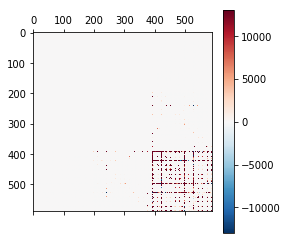

In [338]:
mat=rebinner(symmetrize(c4))
vmax=np.percentile(mat,99.)
plt.matshow(mat,vmax=vmax,vmin=-vmax,cmap=cm.RdBu_r);plt.colorbar();